<a href="https://colab.research.google.com/github/vandyahmad24/python_deeplearning/blob/master/Augmentor_3_Layer_Epcoh_25_3objek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install Augmentor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import Augmentor
import os

def perbanyak_(ini, sebanyak_ini):
  source_dir = ini
  output_dir = "."
  p = Augmentor.Pipeline(source_directory=source_dir, output_directory=output_dir)
  p.random_distortion(probability=1, grid_width=4, grid_height=4, magnitude=1)
  p.rotate(probability=0.7, max_left_rotation=13, max_right_rotation=13)
  p.zoom_random(probability=0.5, percentage_area=0.9)
  p.crop_random(probability=0.6, percentage_area=0.9)
  p.resize(probability=1.0, width=64, height=64)

#p.sample(sebanyak_ini)
#perbanyak_("drive/My Drive/dataset_training/train/inova", 200)
# perbanyak_("drive/My Drive/dataset_training/train/agna", 200)
# perbanyak_("drive/My Drive/dataset_training/train/carry", 200)

#perbanyak_("drive/My Drive/dataset_training/test/inova", 30)
# perbanyak_("drive/My Drive/dataset_training/test/carry", 30)
# perbanyak_("drive/My Drive/dataset_training/test/agna", 30)

In [ ]:
import glob
import matplotlib.pyplot as plt
#%matplotlib inline

def tampilkan_6_kali_5_gambar_pada_alamat(ini):
  a = glob.glob(ini)

  w=10
  h=10
  fig=plt.figure(figsize=(8, 8))
  columns = 6
  rows = 5
  for i in range(1, columns*rows +1):
      img = plt.imread(a[i])
      fig.add_subplot(rows, columns, i)
      plt.imshow(img)
  plt.show()


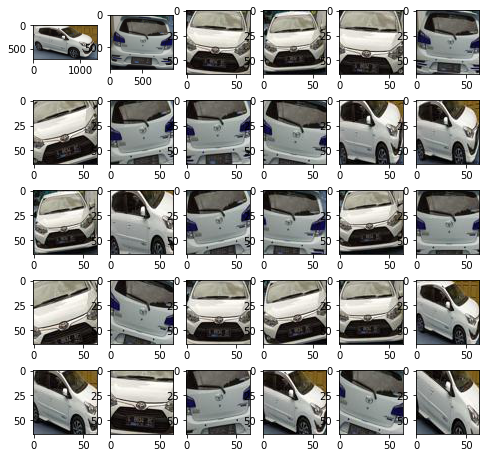

In [ ]:
tampilkan_6_kali_5_gambar_pada_alamat("drive/My Drive/dataset_training/train/agna/*")

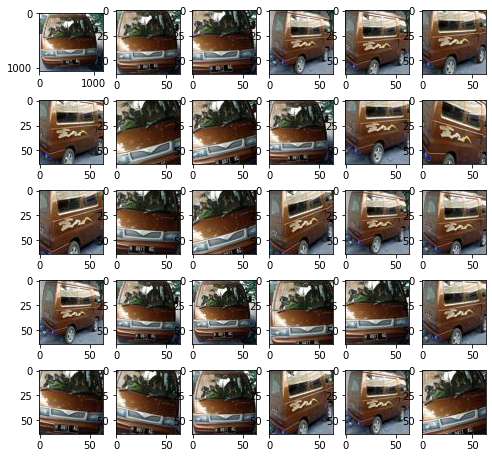

In [ ]:
tampilkan_6_kali_5_gambar_pada_alamat("drive/My Drive/dataset_training/train/carry/*")

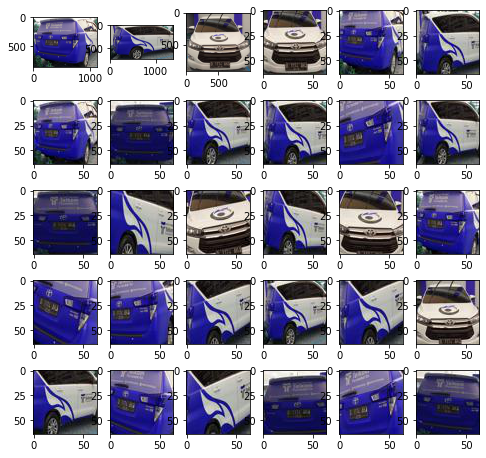

In [ ]:
tampilkan_6_kali_5_gambar_pada_alamat("drive/My Drive/dataset_training/train/inova/*")

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import categorical_accuracy

size_ = 32

model = Sequential()
#menghitung input size : 

#-------------------------------------------------------------------------------------------
model.add(Conv2D(32, (3, 3), input_shape = (size_, size_, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
#-------------------------------------------------------------------------------------------
model.add(Conv2D(16, (3, 3), input_shape = (15, 15, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
#-------------------------------------------------------------------------------------------
model.add(Conv2D(8, (3, 3), input_shape = (7, 7, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
#------------------------------------------------------------------------------------------- digunakan untuk mengubah matrik menjadi panjang 1
model.add(Flatten())

model.add(Dense(units = 10, activation = 'relu'))
#-------------------------------------------------------------------------------------------

model.add(Dense(units = 3, activation = 'softmax'))

# model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = [categorical_accuracy])

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 13, 13, 16)        4624      
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 4, 4, 8)           1160      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 2, 2, 8)           0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 32)              

In [ ]:
train = ImageDataGenerator(rescale = 1./255)
test = ImageDataGenerator(rescale = 1./255)
train_data = train.flow_from_directory('drive/My Drive/dataset_training/train', target_size = (size_, size_), batch_size = 32, class_mode = 'categorical')
test_data = test.flow_from_directory('drive/My Drive/dataset_training/test', target_size = (size_, size_), batch_size = 32, class_mode = 'categorical')

Found 1669 images belonging to 3 classes.
Found 250 images belonging to 3 classes.


In [ ]:
!rm -rf "drive/My Drive/dataset_training/test/.ipynb_checkpoints"

In [ ]:
model.fit_generator(train_data, steps_per_epoch = 100, epochs = 25, validation_data = test_data, validation_steps = 100)

Epoch 1/25
100/100 [==============================] - 15s 151ms/step - loss: 0.9357 - categorical_accuracy: 0.6713 - val_loss: 0.7864 - val_categorical_accuracy: 0.7308
Epoch 2/25
100/100 [==============================] - 15s 146ms/step - loss: 0.5072 - categorical_accuracy: 0.7959 - val_loss: 0.3742 - val_categorical_accuracy: 0.8652
Epoch 3/25
100/100 [==============================] - 14s 143ms/step - loss: 0.3093 - categorical_accuracy: 0.8926 - val_loss: 0.2955 - val_categorical_accuracy: 0.8555
Epoch 4/25
100/100 [==============================] - 15s 147ms/step - loss: 0.1919 - categorical_accuracy: 0.9316 - val_loss: 0.0751 - val_categorical_accuracy: 0.9638
Epoch 5/25
100/100 [==============================] - 14s 145ms/step - loss: 0.1286 - categorical_accuracy: 0.9548 - val_loss: 0.1766 - val_categorical_accuracy: 0.8603
Epoch 6/25
100/100 [==============================] - 14s 140ms/step - loss: 0.1066 - categorical_accuracy: 0.9622 - val_loss: 0.0713 - val_categorical_acc

In [ ]:
model.save_weights("3layer8conv32_16_dan_6size.h5")

In [ ]:
#a = "drive/My Drive/dataset_training/test/agna/file_11.jpg"
import glob
agna = glob.glob("drive/My Drive/dataset_training/test/agna/*.jpg")
carry = glob.glob("drive/My Drive/dataset_training/test/carry/*.jpg")
inova = glob.glob("drive/My Drive/dataset_training/test/inova/*.jpg")
jumlah_dataset = len(agna)
jumlah_dataset_carry = len(carry)
jumlah_dataset_inova = len(inova)


  

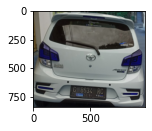

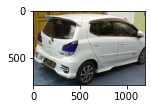

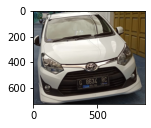

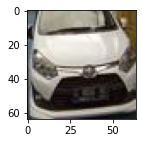

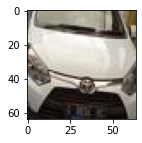

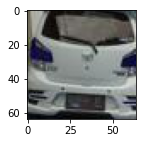

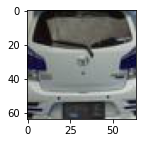

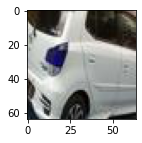

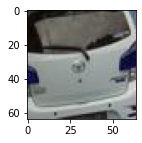

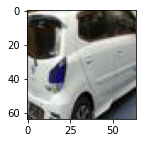

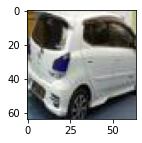

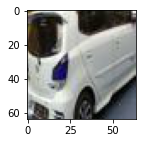

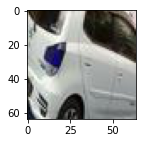

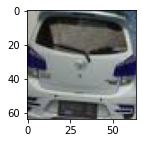

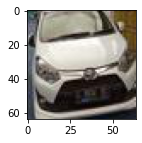

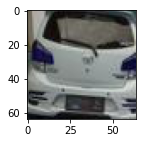

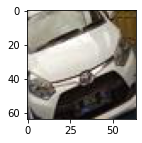

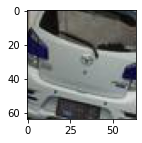

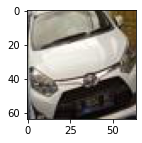

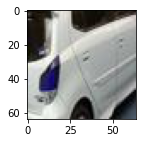

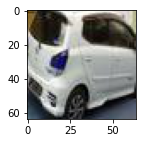

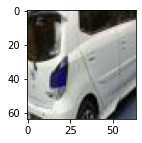

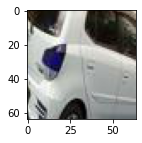

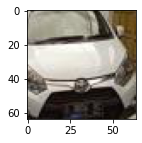

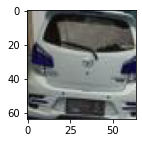

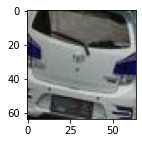

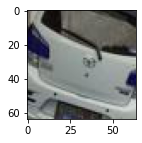

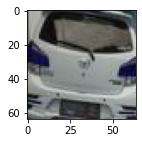

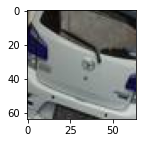

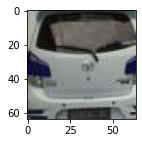

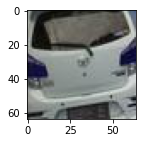

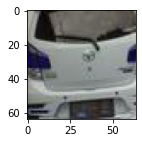

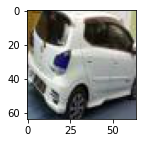

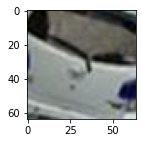

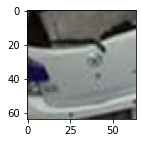

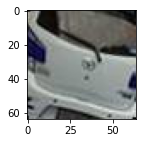

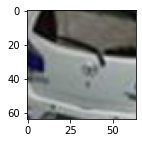

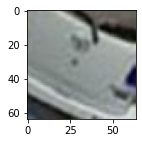

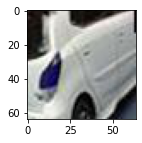

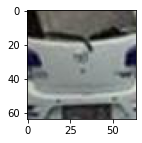

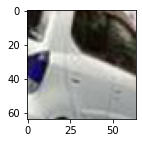

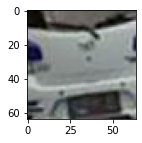

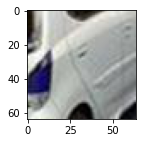

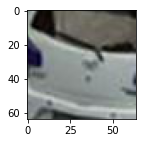

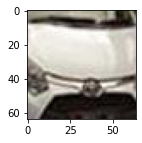

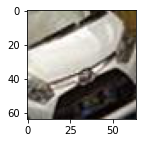

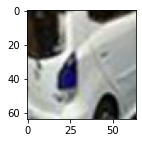

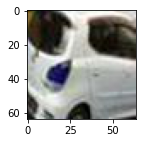

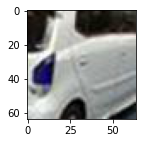

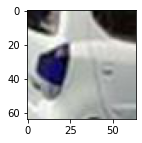

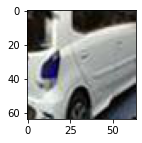

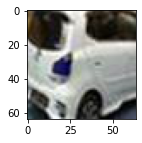

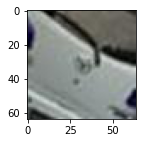

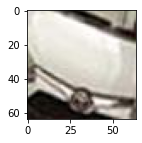

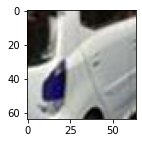

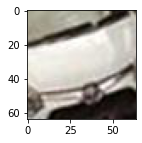

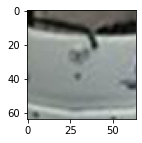

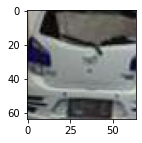

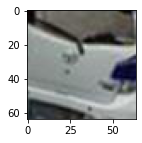

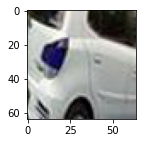

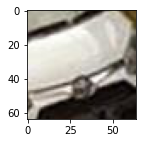

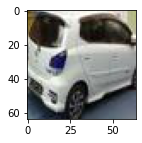

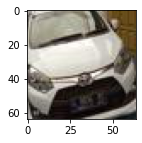

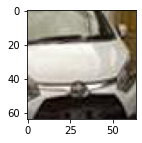

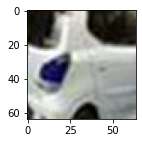

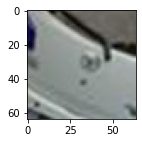

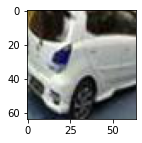

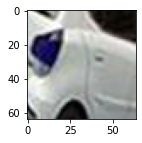

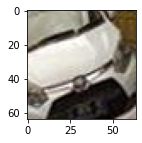

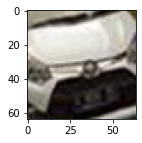

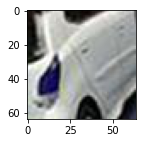

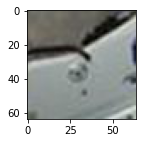

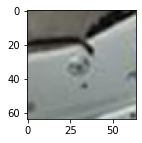

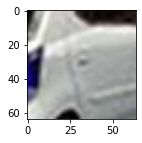

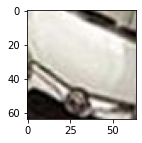

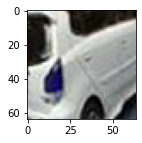

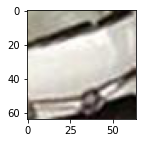

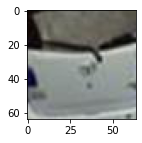

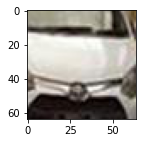

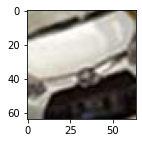

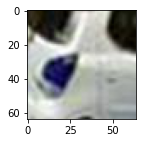

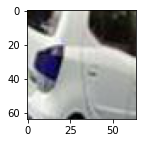

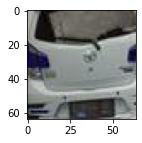

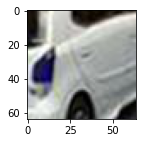

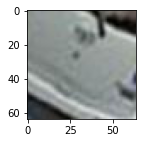

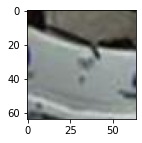

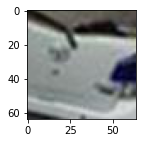

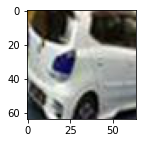

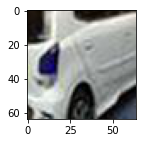

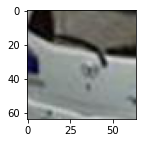

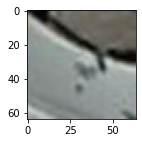

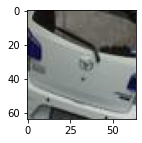

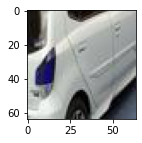

In [ ]:
def tampilkan_(ini):
  fig = plt.figure(figsize=(2, 2))
  img = plt.imread(ini)
  plt.imshow(img)
  plt.show()

#tampilkan_(a)
for i in range(jumlah_dataset):
  tampilkan_(agna[i])


In [ ]:
def switch_dict_key_values(this_dict):
    return dict((v,k) for k,v in this_dict.items())

nama_train_data = switch_dict_key_values(train_data.class_indices)
print(nama_train_data)

{0: 'agna', 1: 'carry', 2: 'inova'}


In [ ]:
from keras.preprocessing import image
import numpy as np
#agna
total_agna = 0
for i in range(jumlah_dataset):
  #print(agna[i])
  img = image.load_img(agna[i], target_size = (size_, size_))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)

  hasil = model.predict_classes(img)
  #print(hasil)
  print("File gambar [", agna[i], "] diprediksi sebagai", hasil, "alias terbaca sebagai :: ", nama_train_data[hasil[0]], ".")
  total_agna += (0 == hasil[0])*1
print(total_agna/int(jumlah_dataset))


File gambar [ drive/My Drive/dataset_training/test/agna/file_11.jpg ] diprediksi sebagai [0] alias terbaca sebagai ::  agna .
File gambar [ drive/My Drive/dataset_training/test/agna/file_14.jpg ] diprediksi sebagai [0] alias terbaca sebagai ::  agna .
File gambar [ drive/My Drive/dataset_training/test/agna/file_13.jpg ] diprediksi sebagai [0] alias terbaca sebagai ::  agna .
File gambar [ drive/My Drive/dataset_training/test/agna/agna_original_file_13.jpg_df355b3a-38bf-4803-9d20-a28d140f2bc6.jpg ] diprediksi sebagai [0] alias terbaca sebagai ::  agna .
File gambar [ drive/My Drive/dataset_training/test/agna/agna_original_file_13.jpg_89a18109-a20f-4b67-a86d-8cc08c495b6f.jpg ] diprediksi sebagai [0] alias terbaca sebagai ::  agna .
File gambar [ drive/My Drive/dataset_training/test/agna/agna_original_file_11.jpg_026a1678-ecfc-4028-9fe5-407dd2ff0e21.jpg ] diprediksi sebagai [0] alias terbaca sebagai ::  agna .
File gambar [ drive/My Drive/dataset_training/test/agna/agna_original_file_11.j

In [ ]:
#carrry
total_carry = 0
for i in range(jumlah_dataset_carry):
  img = image.load_img(carry[i], target_size = (size_, size_))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)

  hasil = model.predict_classes(img)
  print("File gambar [", carry[i], "] diprediksi sebagai", hasil, "alias terbaca sebagai :: ", nama_train_data[hasil[0]], ".")
  total_carry += (1 == hasil[0])*1
print(total_carry/int(jumlah_dataset_carry))
  


File gambar [ drive/My Drive/dataset_training/test/carry/file_37.jpg ] diprediksi sebagai [0] alias terbaca sebagai ::  agna .
File gambar [ drive/My Drive/dataset_training/test/carry/file_19.jpg ] diprediksi sebagai [1] alias terbaca sebagai ::  carry .
File gambar [ drive/My Drive/dataset_training/test/carry/file_25.jpg ] diprediksi sebagai [0] alias terbaca sebagai ::  agna .
File gambar [ drive/My Drive/dataset_training/test/carry/carry_original_file_37.jpg_260f0598-4633-4223-8213-e89e824a30bd.jpg ] diprediksi sebagai [0] alias terbaca sebagai ::  agna .
File gambar [ drive/My Drive/dataset_training/test/carry/carry_original_file_19.jpg_b3fa1078-7401-40a1-84a2-efa34cc41391.jpg ] diprediksi sebagai [1] alias terbaca sebagai ::  carry .
File gambar [ drive/My Drive/dataset_training/test/carry/carry_original_file_37.jpg_4cc11857-9faa-494b-b869-1a2015c14468.jpg ] diprediksi sebagai [0] alias terbaca sebagai ::  agna .
File gambar [ drive/My Drive/dataset_training/test/carry/carry_origi

In [ ]:
#inova

from keras.preprocessing import image
import numpy as np
#inova
total_inova = 0
for i in range(jumlah_dataset_inova):
  #print(inova[i])
  img = image.load_img(inova[i], target_size = (size_, size_))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)

  hasil = model.predict_classes(img)
  #print(hasil)
  print("File gambar [", inova[i], "] diprediksi sebagai", hasil, "alias terbaca sebagai :: ", nama_train_data[hasil[0]], ".")
  total_inova += (0 == hasil[0])*1
print(total_inova/int(jumlah_dataset))


File gambar [ drive/My Drive/dataset_training/test/inova/file_52.jpg ] diprediksi sebagai [2] alias terbaca sebagai ::  inova .
File gambar [ drive/My Drive/dataset_training/test/inova/file_53.jpg ] diprediksi sebagai [0] alias terbaca sebagai ::  agna .
File gambar [ drive/My Drive/dataset_training/test/inova/file_59.jpg ] diprediksi sebagai [2] alias terbaca sebagai ::  inova .
File gambar [ drive/My Drive/dataset_training/test/inova/file_62.jpg ] diprediksi sebagai [2] alias terbaca sebagai ::  inova .
File gambar [ drive/My Drive/dataset_training/test/inova/inova_original_file_52.jpg_f85b3a45-e3e3-46d9-96d8-3da79acbeaa5.jpg ] diprediksi sebagai [2] alias terbaca sebagai ::  inova .
File gambar [ drive/My Drive/dataset_training/test/inova/inova_original_file_52.jpg_ea9536be-bdff-4439-8c5a-c7b89ca98232.jpg ] diprediksi sebagai [2] alias terbaca sebagai ::  inova .
File gambar [ drive/My Drive/dataset_training/test/inova/inova_original_file_59.jpg_c596741d-024f-4832-b933-8cfd4d8a376b.